# Analyzing Crime with Python

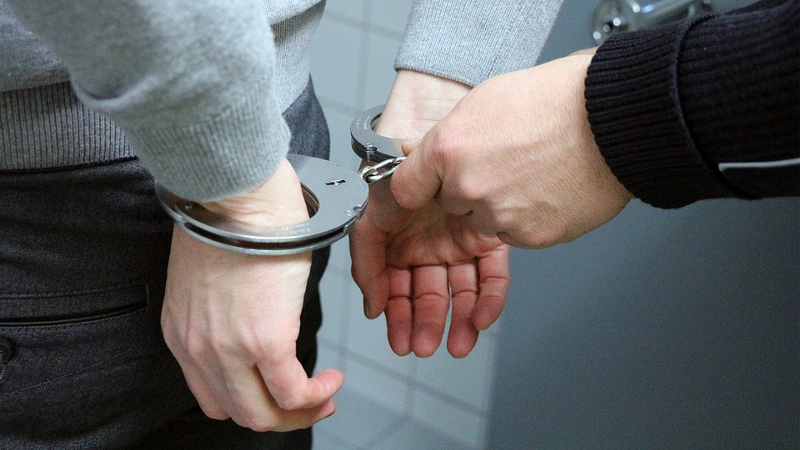

## This analysis is divided into 3 parts

* #### Generating general stats about the crimes in Chicago.
* #### Analyzing arrests made.
* #### Analyzing top 5 crimes of Chicago in the year 2015 and 2016.

#### Lets begin our analysis.

##### Load libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings                        
warnings.filterwarnings("ignore")

#### Get Data

In [60]:
crimes = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

In [61]:
crimes.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"


In [81]:
crimes.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.284570e+05,5.284570e+05,528457.000000,528457.000000,528455.000000,528457.000000,5.110680e+05,5.110680e+05,528457.000000,511068.000000,511068.000000
mean,4.030384e+06,1.034563e+07,1145.657872,11.227123,22.928821,37.240515,1.164460e+06,1.885937e+06,2015.502334,41.842612,-87.672013
std,1.718448e+06,5.663949e+05,690.604763,6.898849,13.866108,21.394615,1.634504e+04,3.112365e+04,0.499995,0.085599,0.059499
min,3.000000e+00,2.171400e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813897e+06,2015.000000,41.644590,-87.928909
25%,3.381820e+06,1.014746e+07,613.000000,6.000000,10.000000,23.000000,1.152564e+06,1.858929e+06,2015.000000,41.768348,-87.715230
50%,3.514834e+06,1.037163e+07,1024.000000,10.000000,23.000000,32.000000,1.166097e+06,1.892277e+06,2016.000000,41.860187,-87.665906
75%,6.091707e+06,1.059204e+07,1711.000000,17.000000,34.000000,56.000000,1.176362e+06,1.908613e+06,2016.000000,41.904939,-87.628077
max,6.253474e+06,1.082787e+07,2535.000000,31.000000,50.000000,77.000000,1.205117e+06,1.951535e+06,2016.000000,42.022671,-87.524529


In [82]:
crimes.drop(['Unnamed: 0', 'Case Number','Block','IUCR', 'X Coordinate', 'Y Coordinate','Updated On', 'FBI Code', 'Beat','Ward','Community Area', 'Location','Latitude','Longitude','District'], inplace=True, axis=1)
crimes.head(4)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month,Weekday
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016,May,Tuesday
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016,May,Tuesday
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016,May,Tuesday
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,2016,May,Tuesday


In [83]:
crimes = crimes[(crimes['Year']==2016)|(crimes['Year']==2015)]
crimes.describe()

,ID,Year
count,5.284570e+05,528457.000000
mean,1.034563e+07,2015.502334
std,5.663949e+05,0.499995
min,2.171400e+04,2015.000000
25%,1.014746e+07,2015.000000
50%,1.037163e+07,2016.000000
75%,1.059204e+07,2016.000000
max,1.082787e+07,2016.000000


#### Convert date in the data set to an interpretative format that python can understand.

In [63]:
crimes['Date']=pd.to_datetime(crimes['Date'],format='%m/%d/%Y %I:%M:%S %p')

#### Create a new column ‘Month’ that records the month of the incident.



In [85]:
import calendar
crimes['Month']=(crimes['Date'].dt.month).apply(lambda x:calendar.month_abbr[x])
crimes.head(4)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month,Weekday
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016,May,Tuesday
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016,May,Tuesday
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016,May,Tuesday
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,2016,May,Tuesday


In [86]:
crimes['Month']=pd.Categorical(crimes['Month'],categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)

#### Create a new column ‘Weekday’ that records the day of the week on which the incident occurred.

In [87]:
crimes["Weekday"]=crimes['Date'].dt.weekday_name
crimes['Weekday']=pd.Categorical(crimes['Weekday'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Month,Weekday
0,10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,2016,May,Tuesday
1,10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2016,May,Tuesday
2,10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,2016,May,Tuesday
3,10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,2016,May,Tuesday
4,10508699,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,2016,May,Tuesday


# Lets start with our analysis

## No of Crimes reported each year

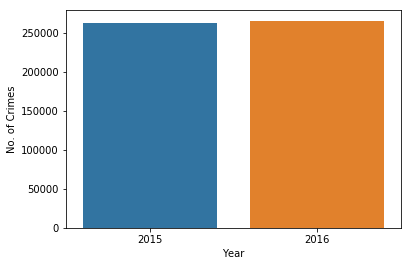

In [88]:
sns.countplot(x='Year',data=crimes)
plt.ylabel('No. of Crimes')
plt.show()

##### Almost same number of cases have been reported in 2015 and 2016.

## Monthly trend in crimes


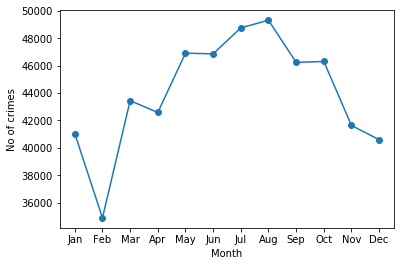

In [89]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimes.groupby('Month')['ID'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of crimes')
plt.show()

##### Crime rates drop in winter.

## Comparing crimes per month in 2015 and 2016

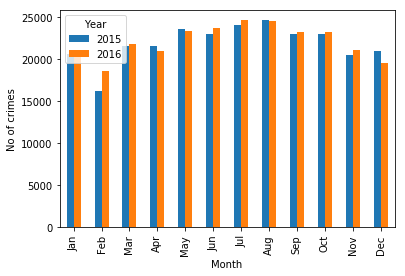

In [90]:
crimes.groupby(['Month','Year'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of crimes')
plt.show()

#### The trend has remained the same. Almost same no. of cases have been reported each month in 2015 and 2016

# Weekly trend


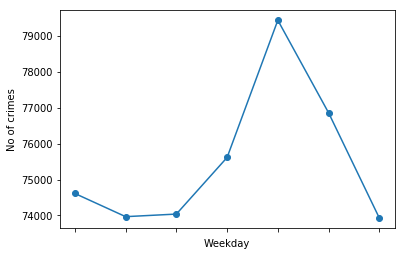

In [91]:
crimes.groupby('Weekday')['ID'].count().plot(marker='o',label='crimes')
plt.ylabel('No of crimes')
plt.show()

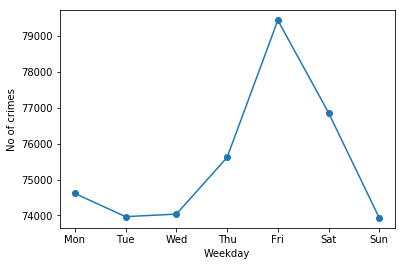

In [92]:
Weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
crimes.groupby('Weekday')['ID'].count().plot(marker='o',label='crimes')
plt.xticks(np.arange(7),Weekday)
plt.ylabel('No of crimes')
plt.show()


# Types of Crime

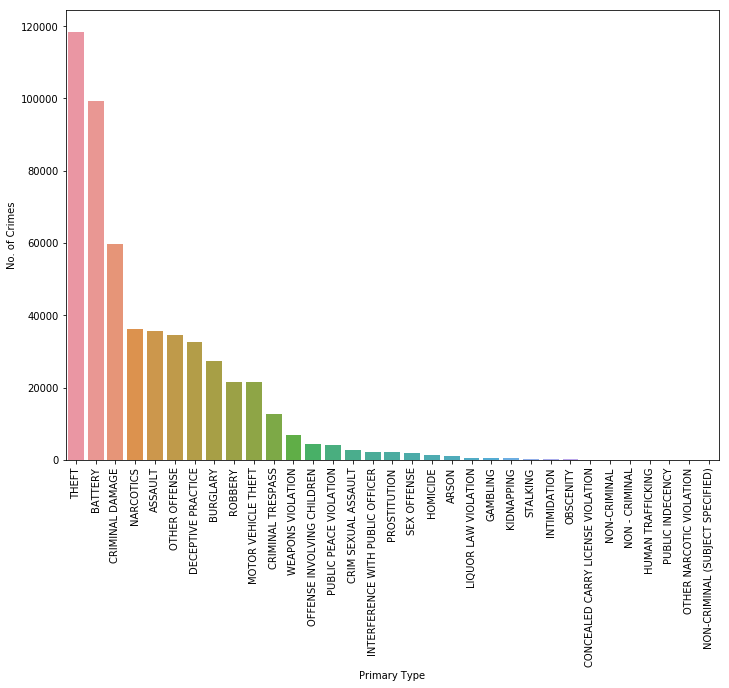

In [93]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax,x='Primary Type',data=crimes,order=crimes['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No. of Crimes')
plt.show()

# Top 5 crimes in Chicago in the year 2015 and 2016 are

### 1.Theft
### 2.Battery
### 3.Criminal damage
### 4.Narcotics
### 5.Assault

# Top 10 locations of Crime

In [94]:
temp=crimes.groupby('Location Description')['ID'].count().sort_values(ascending=False)
temp=temp[:10]
temp

Location Description
STREET                            121632
RESIDENCE                          85754
APARTMENT                          68607
SIDEWALK                           51134
OTHER                              21552
PARKING LOT/GARAGE(NON.RESID.)     15538
SMALL RETAIL STORE                 11322
RESIDENTIAL YARD (FRONT/BACK)      11059
ALLEY                              10877
RESTAURANT                         10635
Name: ID, dtype: int64

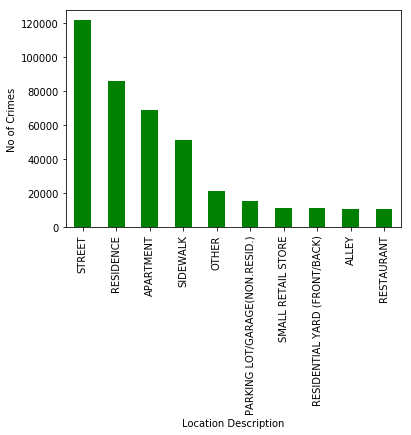

In [95]:
temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

Lets look at arrests made by Chicago Police.

# Arrest Stats:
### Was the criminal arrested?



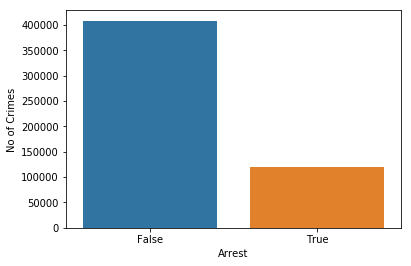

In [96]:
sns.countplot(x='Arrest',data=crimes)
plt.ylabel('No of Crimes')
plt.show()

#### In most of the cases there was no arrest made and this is surprising.


# Year-wise Arrests

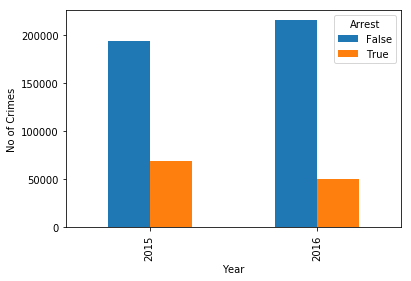

In [97]:
crimes.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()


## Crime-Wise arrests

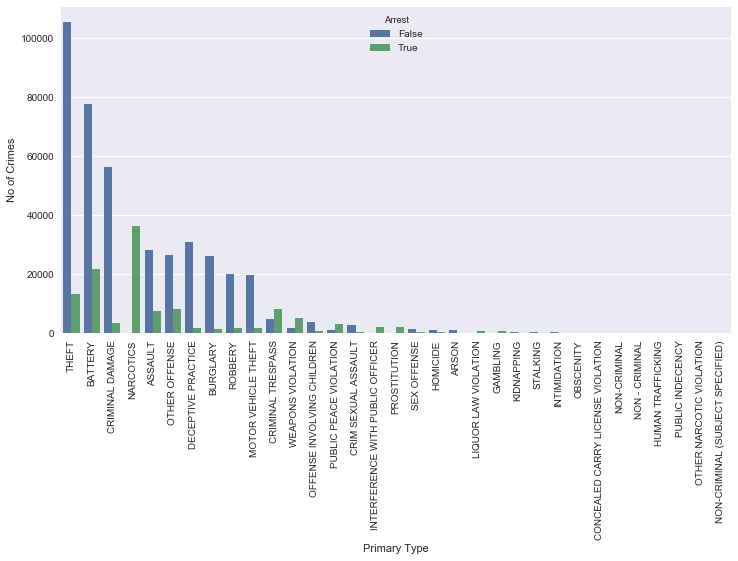

In [98]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=crimes,order=crimes['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [99]:
arrest=crimes[crimes['Arrest']==True]
arrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119783 entries, 0 to 1456713
Data columns (total 10 columns):
ID                      119783 non-null int64
Date                    119783 non-null datetime64[ns]
Primary Type            119783 non-null object
Description             119783 non-null object
Location Description    119781 non-null object
Arrest                  119783 non-null bool
Domestic                119783 non-null bool
Year                    119783 non-null int64
Month                   119783 non-null category
Weekday                 119783 non-null category
dtypes: bool(2), category(2), datetime64[ns](1), int64(2), object(3)
memory usage: 6.9+ MB


## Crime vs Arrest

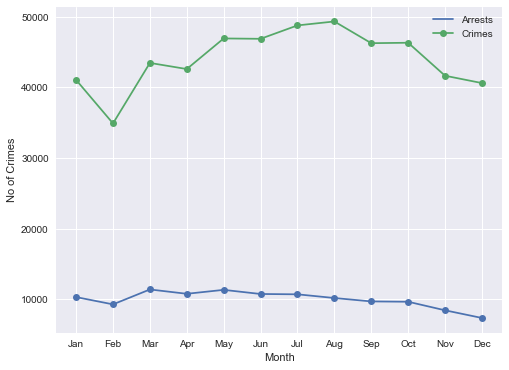

In [100]:
arrest.groupby('Month')['ID'].count().plot(legend=True,label='Arrests',marker='o',figsize=(8,6))
crimes.groupby('Month')['ID'].count().plot(legend=True,label='Crimes',marker='o')
plt.ylabel('No of Crimes')
plt.xticks(np.arange(12),months)
plt.show()

### The number of Arrests made are way less than the number of crimes committed.

In [102]:
arrest.groupby('Month')['ID'].count()

Month
Jan    10303
Feb     9273
Mar    11383
Apr    10770
May    11327
Jun    10742
Jul    10695
Aug    10173
Sep     9690
Oct     9645
Nov     8434
Dec     7348
Name: ID, dtype: int64

In [103]:
crimes.groupby('Month')['ID'].count()

Month
Jan    41031
Feb    34877
Mar    43438
Apr    42572
May    46902
Jun    46850
Jul    48747
Aug    49304
Sep    46231
Oct    46293
Nov    41626
Dec    40586
Name: ID, dtype: int64

## Analysing top 5 crimes

In [104]:
top_crime=crimes[(crimes['Primary Type']=='THEFT')|(crimes['Primary Type']=='BATTERY')|(crimes['Primary Type']=='CRIMINAL DAMAGE')|(crimes['Primary Type']=='NARCOTICS')|(crimes['Primary Type']=='ASSAULT')]

In [105]:
temp=top_crime.pivot_table(values='ID', index='Month', columns='Year', aggfunc=np.size)

In [106]:
temp

Year,2015,2016
Month,,
May,13404,12934
Apr,10686,12110
Nov,14529,14567
Jan,14582,13939
Feb,16073,15638
Mar,15475,15849
Jun,16300,16408
Jul,16611,16086
Aug,15524,15263


### Lets visualize this using a heat map. 

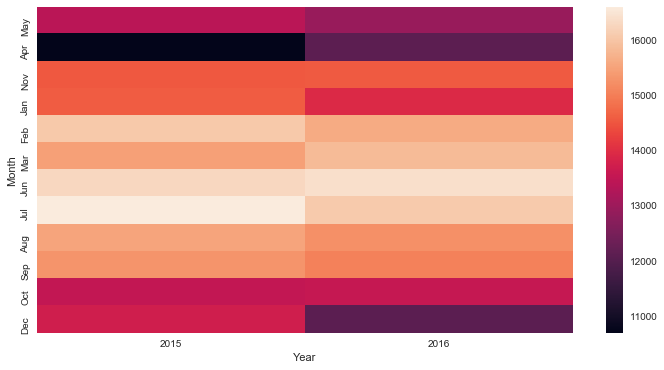

In [107]:
sns.heatmap(temp)
plt.show()

### Intense amount of criminal activities have happened from May to August.

#### Lets get a clear picture on this.

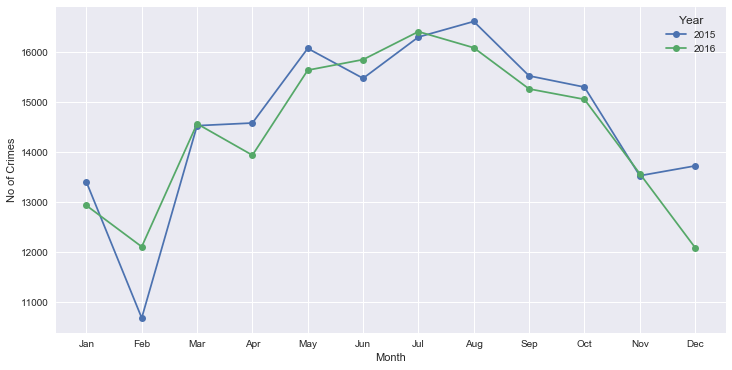

In [108]:
top_crime.groupby(['Month','Year'])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

## Hour of crime

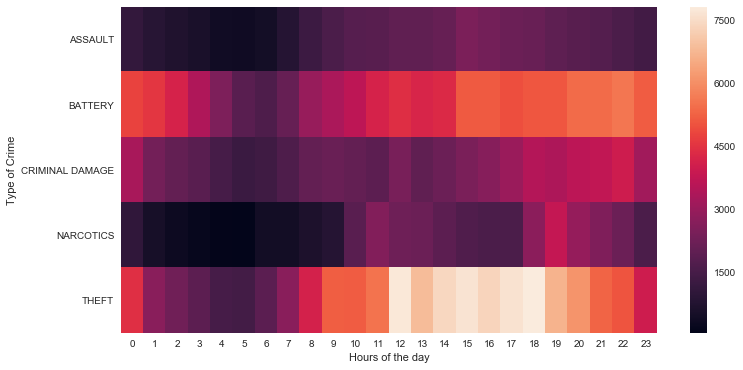

In [109]:
temp= top_crime.pivot_table(values='ID', index='Primary Type',columns=top_crime['Date'].dt.hour, aggfunc=np.size)
sns.heatmap(temp)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

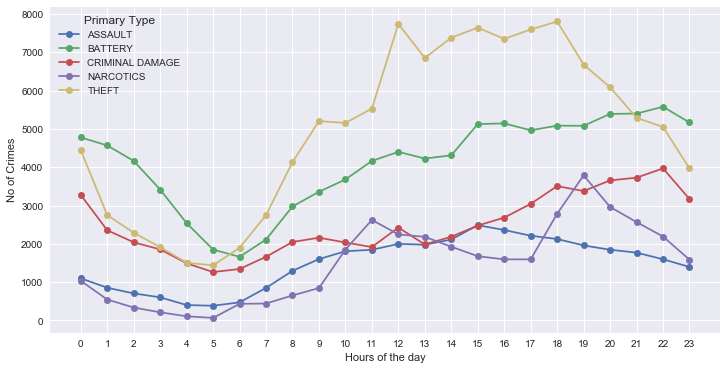

In [110]:
top_crime.groupby([top_crime['Date'].dt.hour,'Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Hours of the day')
plt.xticks(np.arange(24))
plt.show()

##### Crime rates drop from 1 AM to 5 AM.

## Monthly trend in types of crime

In [111]:
temp= top_crime.pivot_table(values='ID', index='Primary Type', columns='Month', aggfunc=np.size)
temp

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Primary Type,,,,,,,,,,,,
ASSAULT,2904,3462,3405,2322,2447,3304,3351,3221,3087,2669,3076,2502
BATTERY,8142,9602,9419,6408,7263,9258,9210,8579,8371,7368,8408,7119
CRIMINAL DAMAGE,4854,5330,5103,3591,4295,5807,5657,5360,5348,4962,4776,4564
NARCOTICS,3520,3347,3058,3255,3462,3142,2885,2744,2723,2355,3918,1837
THEFT,9101,9970,10339,7220,8871,11197,11594,10883,10826,9745,8918,9795


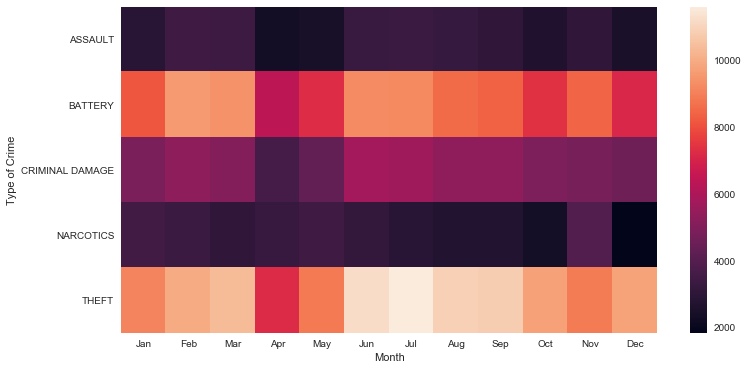

In [112]:
sns.heatmap(temp)
plt.ylabel('Type of Crime')
plt.show()

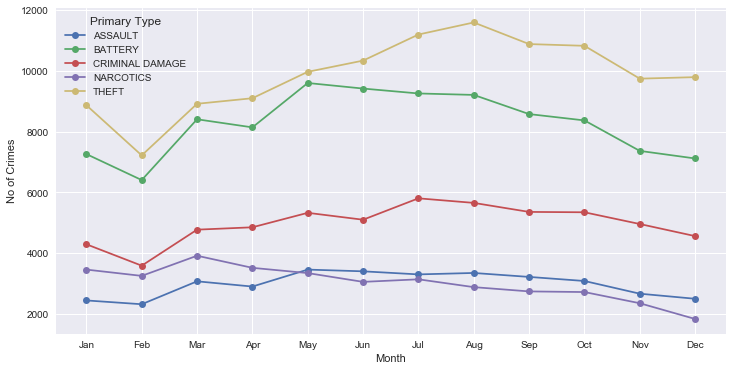

In [113]:
top_crime.groupby(['Month','Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

# Weekly trend in top 5 crime

In [114]:
temp= top_crime.pivot_table(values='ID', index='Primary Type', columns='Weekday', aggfunc=np.size)
temp

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Primary Type,,,,,,,
ASSAULT,5076,5142,5329,4904,5248,4897,5154
BATTERY,13758,13653,12896,15882,12801,16927,13230
CRIMINAL DAMAGE,8845,8157,7705,9717,7910,9182,8131
NARCOTICS,5940,4837,5227,4696,5340,4551,5655
THEFT,18223,16843,16674,17116,16883,15552,17168


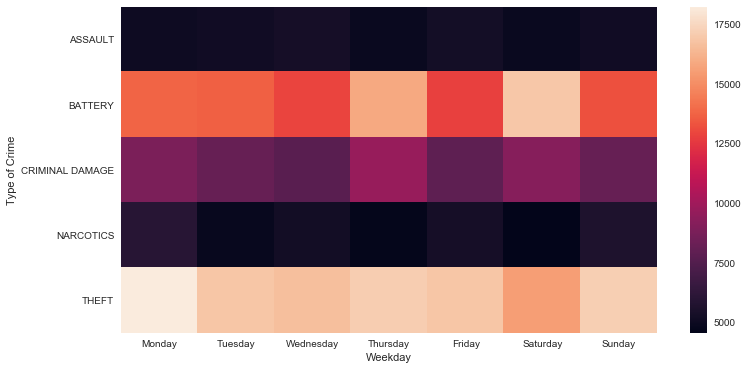

In [115]:
sns.heatmap(temp)
plt.ylabel('Type of Crime')
plt.show()

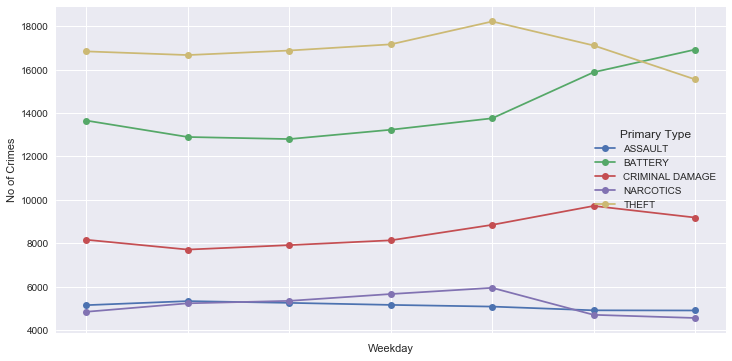

In [116]:
top_crime.groupby(['Weekday','Primary Type',])['ID'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.show()

# Locations where these top 5 Crimes have occured
#### we only consider top 20 locations and label the rest of locations as ‘OTHER’.



In [122]:
temp=list(top_crime['Location Description'].value_counts()[:20].index)
top_crime['Location Description']=np.where(top_crime['Location Description'].isin(temp),top_crime['Location Description'],'OTHER')

In [123]:
top_crime['Location Description'].value_counts()

STREET                            83162
APARTMENT                         46057
RESIDENCE                         45688
OTHER                             45229
SIDEWALK                          36800
PARKING LOT/GARAGE(NON.RESID.)    11829
RESIDENTIAL YARD (FRONT/BACK)      8406
SMALL RETAIL STORE                 8299
RESIDENCE PORCH/HALLWAY            7643
VEHICLE NON-COMMERCIAL             7354
ALLEY                              7246
RESTAURANT                         7173
DEPARTMENT STORE                   6998
SCHOOL, PUBLIC, BUILDING           6546
GROCERY FOOD STORE                 5025
RESIDENCE-GARAGE                   4277
GAS STATION                        3444
PARK PROPERTY                      3240
BAR OR TAVERN                      2888
CONVENIENCE STORE                  1945
Name: Location Description, dtype: int64

In [119]:
temp= top_crime.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size)
temp

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Location Description,,,,,
ALLEY,877,2068,980,2286,1035
APARTMENT,5327,24264,7719,1332,7415
BAR OR TAVERN,110,974,140,21,1643
CONVENIENCE STORE,267,292,175,53,1158
DEPARTMENT STORE,173,165,79,18,6563
GAS STATION,475,644,387,494,1444
GROCERY FOOD STORE,309,369,162,37,4148
OTHER,4686,9576,6143,3171,21653
PARK PROPERTY,267,906,252,489,1326


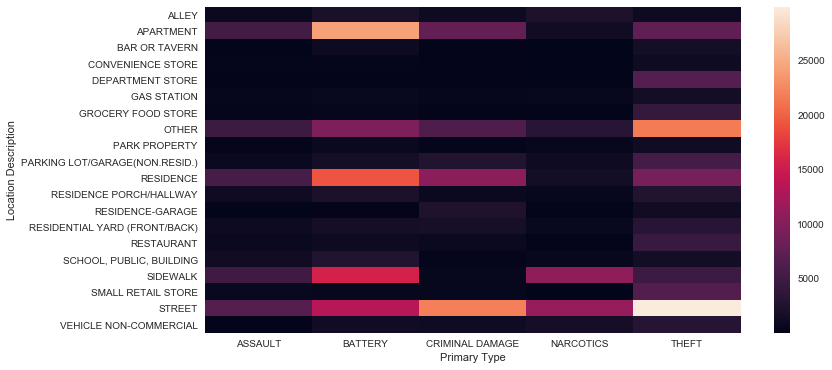

In [120]:
sns.heatmap(temp)
plt.show()

# In this Github repo ive not uploaded the CSV file because it's near about 500MB 
